In [47]:
import pandas as pd
import numpy as np

In [176]:
from sklearn.datasets import fetch_20newsgroups
from gensim import corpora

data = fetch_20newsgroups(subset='train')
data = data['data']


In [61]:
data_test = fetch_20newsgroups(subset='test')

In [62]:
data_test = data_test['target']

In [64]:
data_test[:10]

array([ 7,  5,  0, 17, 19, 13, 15, 15,  5,  1])

In [54]:
print(data_test[1])

From: Rick Miller <rick@ee.uwm.edu>
Subject: X-Face?
Organization: Just me.
Lines: 17
Distribution: world
NNTP-Posting-Host: 129.89.2.33
Summary: Go ahead... swamp me.  <EEP!>

I'm not familiar at all with the format of these "X-Face:" thingies, but
after seeing them in some folks' headers, I've *got* to *see* them (and
maybe make one of my own)!

I've got "dpg-view" on my Linux box (which displays "uncompressed X-Faces")
and I've managed to compile [un]compface too... but now that I'm *looking*
for them, I can't seem to find any X-Face:'s in anyones news headers!  :-(

Could you, would you, please send me your "X-Face:" header?

I *know* I'll probably get a little swamped, but I can handle it.

	...I hope.

Rick Miller  <rick@ee.uwm.edu> | <ricxjo@discus.mil.wi.us>   Ricxjo Muelisto
Send a postcard, get one back! | Enposxtigu bildkarton kaj vi ricevos alion!
          RICK MILLER // 16203 WOODS // MUSKEGO, WIS. 53150 // USA



In [3]:
len(data)

11314

In [177]:
data = data[:500]

In [145]:
print(data[10])

From: irwin@cmptrc.lonestar.org (Irwin Arnstein)
Subject: Re: Recommendation on Duc
Summary: What's it worth?
Distribution: usa
Expires: Sat, 1 May 1993 05:00:00 GMT
Organization: CompuTrac Inc., Richardson TX
Keywords: Ducati, GTS, How much? 
Lines: 13

I have a line on a Ducati 900GTS 1978 model with 17k on the clock.  Runs
very well, paint is the bronze/brown/orange faded out, leaks a bit of oil
and pops out of 1st with hard accel.  The shop will fix trans and oil 
leak.  They sold the bike to the 1 and only owner.  They want $3495, and
I am thinking more like $3K.  Any opinions out there?  Please email me.
Thanks.  It would be a nice stable mate to the Beemer.  Then I'll get
a jap bike and call myself Axis Motors!

-- 
-----------------------------------------------------------------------
"Tuba" (Irwin)      "I honk therefore I am"     CompuTrac-Richardson,Tx
irwin@cmptrc.lonestar.org    DoD #0826          (R75/6)
-------------------------------------------------------------------

# Preprocessing

In [146]:
import nltk

In [178]:
# tokinize
from nltk.tokenize import word_tokenize
text = [word_tokenize(document) for document in data]

In [148]:
help(word_tokenize)

Help on function word_tokenize in module nltk.tokenize:

word_tokenize(text, language='english', preserve_line=False)
    Return a tokenized copy of *text*,
    using NLTK's recommended word tokenizer
    (currently an improved :class:`.TreebankWordTokenizer`
    along with :class:`.PunktSentenceTokenizer`
    for the specified language).
    
    :param text: text to split into words
    :type text: str
    :param language: the model name in the Punkt corpus
    :type language: str
    :param preserve_line: An option to keep the preserve the sentence and not sentence tokenize it.
    :type preserver_line: bool



In [149]:
print(text[1])

['From', ':', 'guykuo', '@', 'carson.u.washington.edu', '(', 'Guy', 'Kuo', ')', 'Subject', ':', 'SI', 'Clock', 'Poll', '-', 'Final', 'Call', 'Summary', ':', 'Final', 'call', 'for', 'SI', 'clock', 'reports', 'Keywords', ':', 'SI', ',', 'acceleration', ',', 'clock', ',', 'upgrade', 'Article-I.D', '.', ':', 'shelley.1qvfo9INNc3s', 'Organization', ':', 'University', 'of', 'Washington', 'Lines', ':', '11', 'NNTP-Posting-Host', ':', 'carson.u.washington.edu', 'A', 'fair', 'number', 'of', 'brave', 'souls', 'who', 'upgraded', 'their', 'SI', 'clock', 'oscillator', 'have', 'shared', 'their', 'experiences', 'for', 'this', 'poll', '.', 'Please', 'send', 'a', 'brief', 'message', 'detailing', 'your', 'experiences', 'with', 'the', 'procedure', '.', 'Top', 'speed', 'attained', ',', 'CPU', 'rated', 'speed', ',', 'add', 'on', 'cards', 'and', 'adapters', ',', 'heat', 'sinks', ',', 'hour', 'of', 'usage', 'per', 'day', ',', 'floppy', 'disk', 'functionality', 'with', '800', 'and', '1.4', 'm', 'floppies', 'a

In [179]:
text = [
     [token.strip().lower() for token in document]
     for document in text]

In [180]:
# lematization
lematizer = nltk.stem.WordNetLemmatizer()
lem_text = [
     [lematizer.lemmatize(token) for token in document]
     for document in text]

In [152]:
print(lem_text[1])

['from', ':', 'guykuo', '@', 'carson.u.washington.edu', '(', 'guy', 'kuo', ')', 'subject', ':', 'si', 'clock', 'poll', '-', 'final', 'call', 'summary', ':', 'final', 'call', 'for', 'si', 'clock', 'report', 'keywords', ':', 'si', ',', 'acceleration', ',', 'clock', ',', 'upgrade', 'article-i.d', '.', ':', 'shelley.1qvfo9innc3s', 'organization', ':', 'university', 'of', 'washington', 'line', ':', '11', 'nntp-posting-host', ':', 'carson.u.washington.edu', 'a', 'fair', 'number', 'of', 'brave', 'soul', 'who', 'upgraded', 'their', 'si', 'clock', 'oscillator', 'have', 'shared', 'their', 'experience', 'for', 'this', 'poll', '.', 'please', 'send', 'a', 'brief', 'message', 'detailing', 'your', 'experience', 'with', 'the', 'procedure', '.', 'top', 'speed', 'attained', ',', 'cpu', 'rated', 'speed', ',', 'add', 'on', 'card', 'and', 'adapter', ',', 'heat', 'sink', ',', 'hour', 'of', 'usage', 'per', 'day', ',', 'floppy', 'disk', 'functionality', 'with', '800', 'and', '1.4', 'm', 'floppy', 'are', 'espe

In [181]:
# drop stop words
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords_text = [
     [word for word in document if word not in stopwords]
     for document in lem_text
 ]

In [154]:
print(stopwords_text[1])

[':', 'guykuo', '@', 'carson.u.washington.edu', '(', 'guy', 'kuo', ')', 'subject', ':', 'si', 'clock', 'poll', '-', 'final', 'call', 'summary', ':', 'final', 'call', 'si', 'clock', 'report', 'keywords', ':', 'si', ',', 'acceleration', ',', 'clock', ',', 'upgrade', 'article-i.d', '.', ':', 'shelley.1qvfo9innc3s', 'organization', ':', 'university', 'washington', 'line', ':', '11', 'nntp-posting-host', ':', 'carson.u.washington.edu', 'fair', 'number', 'brave', 'soul', 'upgraded', 'si', 'clock', 'oscillator', 'shared', 'experience', 'poll', '.', 'please', 'send', 'brief', 'message', 'detailing', 'experience', 'procedure', '.', 'top', 'speed', 'attained', ',', 'cpu', 'rated', 'speed', ',', 'add', 'card', 'adapter', ',', 'heat', 'sink', ',', 'hour', 'usage', 'per', 'day', ',', 'floppy', 'disk', 'functionality', '800', '1.4', 'floppy', 'especially', 'requested', '.', 'summarizing', 'next', 'two', 'day', ',', 'please', 'add', 'network', 'knowledge', 'base', 'done', 'clock', 'upgrade', "n't", '

In [155]:
from string import punctuation

In [156]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [217]:
punctuation += '--'
punctuation += "..."
punctuation +="========================================================================"
punctuation += "''"
punctuation += "``"
punctuation += "wa"
punctuation_text = [
     [word for word in document if word not in punctuation]
     for document in stopwords_text
 ]

In [218]:
print(punctuation_text[1])

['guykuo', 'carson.u.washington.edu', 'guy', 'kuo', 'subject', 'si', 'clock', 'poll', 'final', 'call', 'summary', 'final', 'call', 'si', 'clock', 'report', 'keywords', 'si', 'acceleration', 'clock', 'upgrade', 'article-i.d', 'shelley.1qvfo9innc3s', 'organization', 'university', 'washington', 'line', '11', 'nntp-posting-host', 'carson.u.washington.edu', 'fair', 'number', 'brave', 'soul', 'upgraded', 'si', 'clock', 'oscillator', 'shared', 'experience', 'poll', 'please', 'send', 'brief', 'message', 'detailing', 'experience', 'procedure', 'top', 'speed', 'attained', 'cpu', 'rated', 'speed', 'add', 'card', 'adapter', 'heat', 'sink', 'hour', 'usage', 'per', 'day', 'floppy', 'disk', 'functionality', '800', '1.4', 'floppy', 'especially', 'requested', 'summarizing', 'next', 'two', 'day', 'please', 'add', 'network', 'knowledge', 'base', 'done', 'clock', 'upgrade', "n't", 'answered', 'poll', 'thanks', 'guy', 'kuo', 'guykuo', 'u.washington.edu']


In [219]:
bad_words = ["n't", "'s", "si"]
clean_text = [
     [word for word in document if word not in bad_words]
     for document in punctuation_text
 ]

In [220]:
print(clean_text[5])

['dfo', 'vttoulu.tko.vtt.fi', 'foxvog', 'douglas', 'subject', 'rewording', 'second', 'amendment', 'idea', 'organization', 'vtt', 'line', '58', 'article', '1r1eu1', '4t', 'transfer.stratus.com', 'cdt', 'sw.stratus.com', 'c.', 'd.', 'tavares', 'writes', 'article', '1993apr20.083057.16899', 'ousrvr.oulu.fi', 'dfo', 'vttoulu.tko.vtt.fi', 'foxvog', 'douglas', 'writes', 'article', '1qv87v', '4j3', 'transfer.stratus.com', 'cdt', 'sw.stratus.com', 'c.', 'd.', 'tavares', 'writes', 'article', 'c5n3gi.f8f', 'ulowell.ulowell.edu', 'jrutledg', 'cs.ulowell.edu', 'john', 'lawrence', 'rutledge', 'writes', 'massive', 'destructive', 'power', 'many', 'modern', 'weapon', 'make', 'cost', 'accidental', 'crimial', 'usage', 'weapon', 'great', 'weapon', 'mass', 'destruction', 'need', 'control', 'government', 'individual', 'access', 'would', 'result', 'needle', 'death', 'million', 'make', 'right', 'people', 'keep', 'bear', 'many', 'modern', 'weapon', 'non-existant', 'thanks', 'stating', "'re", 'coming', 'needle

In [221]:
#  создаем словарь 
dictionary = corpora.Dictionary(clean_text)

In [222]:
# проводим векторизацию
corpus = [dictionary.doc2bow(text) for text in clean_text]

In [223]:
# tfidf model
tfidf_model = models.TfidfModel(corpus)  

In [224]:
# tfidf 
tfidf = tfidf_model[corpus]

Here we can implement
- RpModel
- LsiModel
- HdpModel
- LdaModel

# LSI

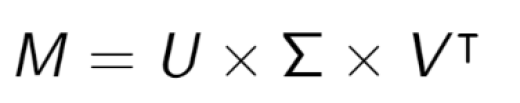

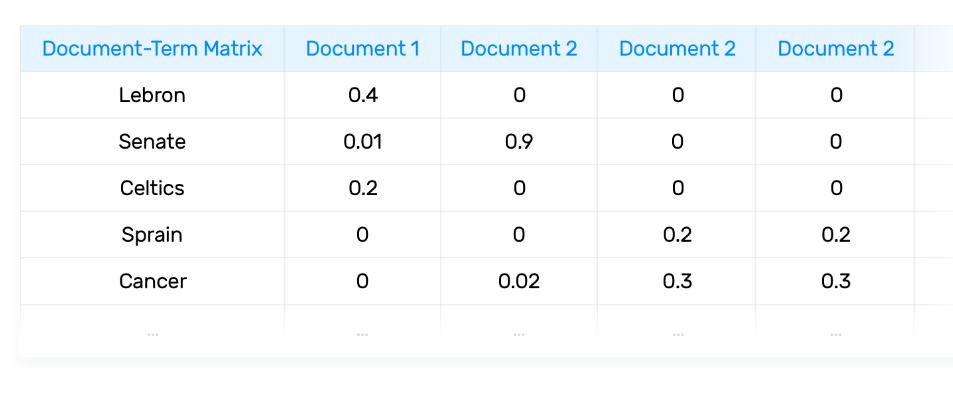

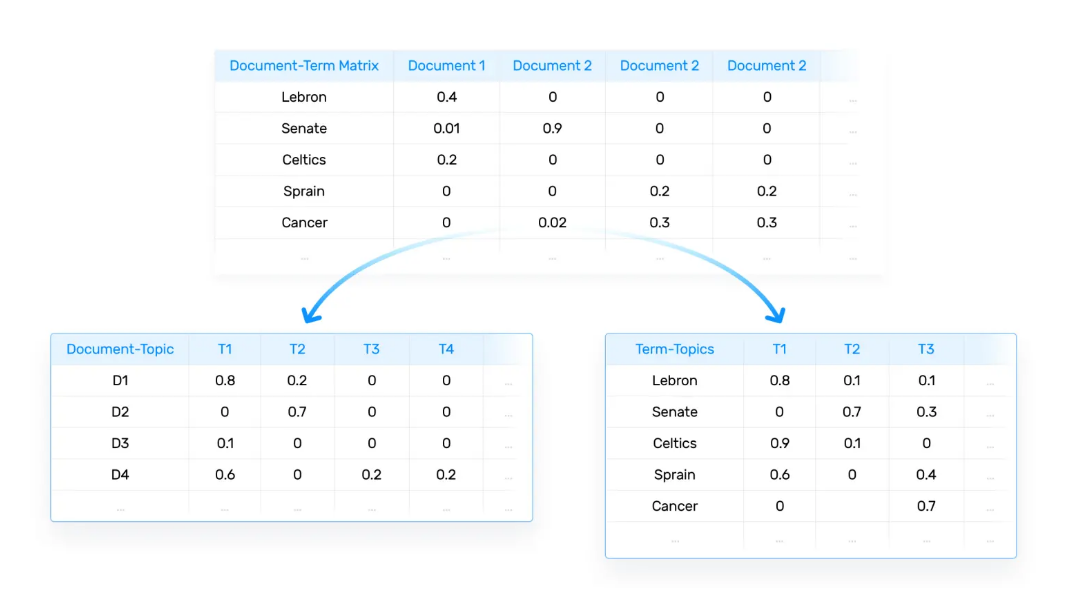

In [225]:
# init model
from gensim import models
lsi = models.LsiModel(tfidf, id2word=dictionary, num_topics=5)

In [226]:
corpus_lsi = lsi[tfidf]

In [227]:
lsi.print_topics(num_words=2)[2]

(2, '-0.378*"armenian" + -0.199*"turkish"')

In [228]:
lsi.show_topics(num_words=3)

[(0, '0.099*"would" + 0.095*"god" + 0.094*"people"'),
 (1, '-0.258*"window" + 0.178*"armenian" + 0.132*"god"'),
 (2, '-0.378*"armenian" + -0.199*"turkish" + 0.187*"god"'),
 (3, '-0.287*"key" + 0.268*"window" + -0.230*"henry"'),
 (4, '-0.439*"key" + -0.152*"phone" + 0.142*"henry"')]

In [169]:
lsi.show_topic(0)

[('car', 0.19409459995202136),
 ('insurance', 0.1696265319908136),
 ('wa', 0.11465785323284518),
 ('year', 0.10041265638456831),
 ("''", 0.09524218283825497),
 ('``', 0.09307057865590068),
 ('rate', 0.08986052937108044),
 ('one', 0.07940138276856727),
 ('thing', 0.07512501355466483),
 ('revolver', 0.07389718085615701)]

# LDA

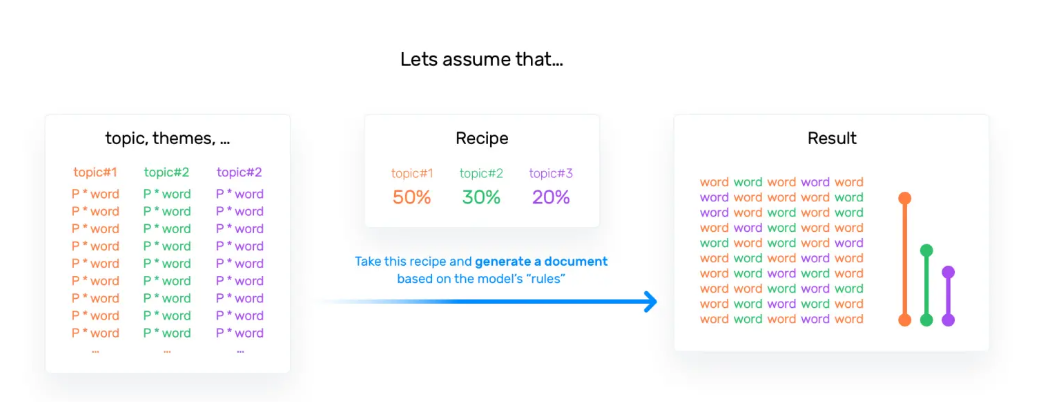

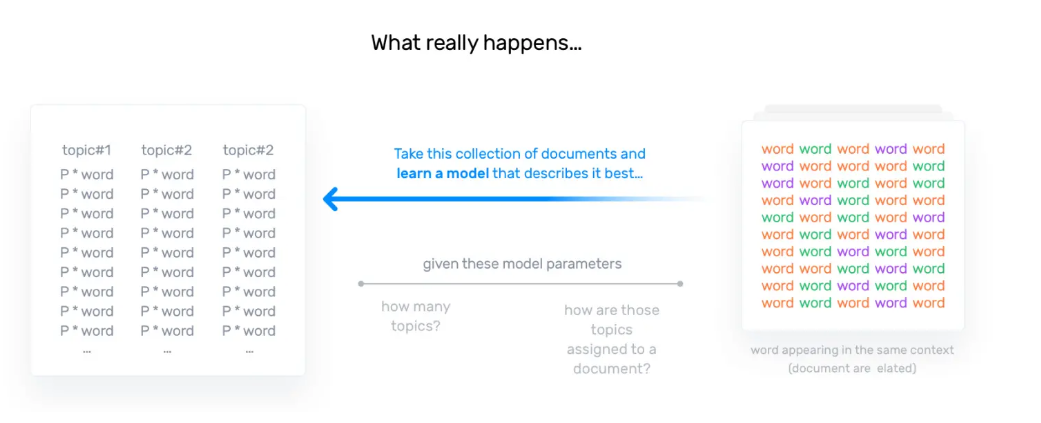

In [170]:
lda = models.LdaModel(tfidf, id2word=dictionary, num_topics=4)

In [171]:
lda.id2word

In [172]:
# for LDA only
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary=lda.id2word)

A:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [173]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.005429  0.002171       1        1  36.435062
1     -0.004966  0.002347       2        1  27.708303
3      0.000199 -0.003627       3        1  22.709080
0     -0.000662 -0.000891       4        1  13.147552, topic_info=     Category      Freq                  Term     Total  loglift  logprob
term                                                                     
2000  Default  2.000000               catalog  2.000000  30.0000  30.0000
705   Default  2.000000                 board  2.000000  29.0000  29.0000
2192  Default  2.000000                 plant  2.000000  28.0000  28.0000
3093  Default  2.000000             ncube.com  2.000000  27.0000  27.0000
972   Default  2.000000                 water  2.000000  26.0000  26.0000
459   Default  2.000000               nuclear  2.000000  25.0000  25.0000
1474  Default  3.000000                  tiff  3.000000  24.0000  24.0000
2112  Default  2.000000              hinckley  2.000000  23.0000  23.0000
2118  Default  2.000000                 kph2q  2.000000  22.0000  22.0000
2115  Default  2.000000                 input  2.000000  21.0000  21.0000
544   Default  2.000000                 thank  2.000000  20.0000  20.0000
515   Default  2.000000              bmdelane  2.000000  19.0000  19.0000
2009  Default  2.000000                   fax  2.000000  18.0000  18.0000
2664  Default  2.000000                  mask  2.000000  17.0000  17.0000
3097  Default  2.000000                   zod  2.000000  16.0000  16.0000
3078  Default  2.000000                     0  2.000000  15.0000  15.0000
3095  Default  2.000000                  root  2.000000  14.0000  14.0000
1940  Default  3.000000               captain  3.000000  13.0000  13.0000
643   Default  2.000000                    pc  2.000000  12.0000  12.0000
2064  Default  2.000000                  font  2.000000  11.0000  11.0000
2133  Default  2.000000                 voice  2.000000  10.0000  10.0000
798   Default  2.000000                 irwin  2.000000   9.0000   9.0000
546   Default  2.000000             treatment  2.000000   8.0000   8.0000
656   Default  2.000000                scsi-1  2.000000   7.0000   7.0000
690   Default  3.000000                  icon  3.000000   6.0000   6.0000
2991  Default  3.000000              revolver  3.000000   5.0000   5.0000
1604  Default  2.000000                 cover  2.000000   4.0000   4.0000
733   Default  2.000000                  kerr  2.000000   3.0000   3.0000
2130  Default  2.000000              virginia  2.000000   2.0000   2.0000
2128  Default  2.000000                vendor  2.000000   1.0000   1.0000
...       ...       ...                   ...       ...      ...      ...
2112   Topic4  0.636559              hinckley  2.404655   0.6999  -7.3878
2118   Topic4  0.636501                 kph2q  2.404602   0.6998  -7.3879
2115   Topic4  0.635131                 input  2.405935   0.6971  -7.3901
459    Topic4  0.677953               nuclear  2.568858   0.6968  -7.3248
544    Topic4  0.623834                 thank  2.391282   0.6852  -7.4080
515    Topic4  0.623482              bmdelane  2.391700   0.6845  -7.4086
2009   Topic4  0.620215                   fax  2.389792   0.6800  -7.4138
3097   Topic4  0.604182                   zod  2.373329   0.6608  -7.4400
3078   Topic4  0.604096                     0  2.373605   0.6605  -7.4402
3095   Topic4  0.603528                  root  2.374066   0.6594  -7.4411
2133   Topic4  0.573698                 voice  2.445513   0.5790  -7.4918
643    Topic4  0.580325                    pc  2.522561   0.5595  -7.4803
2130   Topic4  0.518252              virginia  2.285578   0.5450  -7.5934
2128   Topic4  0.518213                vendor  2.285713   0.5449  -7.5935
2122   Topic4  0.517755  onyx.cs.virginia.edu  2.285988   0.5439  -7.5944
733    Topic4  0.522181                  kerr  2.322822   0.5364  -7.5859
751    

In [135]:
help(models.LdaMulticore)

Help on class LdaMulticore in module gensim.models.ldamulticore:

class LdaMulticore(gensim.models.ldamodel.LdaModel)
 |  An optimized implementation of the LDA algorithm, able to harness the power of multicore CPUs.
 |  Follows the similar API as the parent class :class:`~gensim.models.ldamodel.LdaModel`.
 |  
 |  Method resolution order:
 |      LdaMulticore
 |      gensim.models.ldamodel.LdaModel
 |      gensim.interfaces.TransformationABC
 |      gensim.utils.SaveLoad
 |      gensim.models.basemodel.BaseTopicModel
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, corpus=None, num_topics=100, id2word=None, workers=None, chunksize=2000, passes=1, batch=False, alpha='symmetric', eta=None, decay=0.5, offset=1.0, eval_every=10, iterations=50, gamma_threshold=0.001, random_state=None, minimum_probability=0.01, minimum_phi_value=0.01, per_word_topics=False, dtype=<class 'numpy.float32'>)
 |      Parameters
 |      ----------
 |      corpus : {iterable of list 

In [229]:
lda_model = models.LdaMulticore(tfidf, num_topics=4, id2word=dictionary)

In [232]:
for idx, topic in lda.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.001*"board" + 0.001*"catalog" + 0.001*"plant" + 0.001*"ncube.com" + 0.001*"nuclear" + 0.001*"water" + 0.001*"hinckley" + 0.001*"kph2q" + 0.001*"input" + 0.001*"thank"
Topic: 1 Word: 0.001*"tiff" + 0.001*"captain" + 0.001*"space" + 0.001*"icon" + 0.001*"movie" + 0.001*"traded" + 0.001*"clock" + 0.001*"error" + 0.001*"tom" + 0.001*"3.0"
Topic: 2 Word: 0.001*"car" + 0.001*"kaldis" + 0.001*"weapon" + 0.001*"western" + 0.001*"doug" + 0.001*"unixg.ubc.ca" + 0.001*"exploding" + 0.001*"joplin.biosci.arizona.edu" + 0.001*"wa" + 0.001*"weitek"
Topic: 3 Word: 0.001*"insurance" + 0.001*"mask" + 0.001*"window" + 0.001*"font" + 0.001*"scsi-1" + 0.001*"scsi" + 0.001*"scsi-2" + 0.001*"wyse" + 0.001*"singapore" + 0.001*"terminal"


In [238]:
for index, score in sorted(lda[tfidf[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda.print_topic(index, 3)))


Score: 0.9013366103172302	 
Topic: 0.001*"tiff" + 0.001*"captain" + 0.001*"space"

Score: 0.03312140330672264	 
Topic: 0.001*"car" + 0.001*"kaldis" + 0.001*"weapon"

Score: 0.032773539423942566	 
Topic: 0.001*"board" + 0.001*"catalog" + 0.001*"plant"

Score: 0.032768458127975464	 
Topic: 0.001*"insurance" + 0.001*"mask" + 0.001*"window"


### Performance evaluation

In [234]:
for index, score in sorted(lda_model[tfidf[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 2)))


Score: 0.8989570140838623	 
Topic: 0.000*"would" + 0.000*"question"

Score: 0.03400924429297447	 
Topic: 0.000*"window" + 0.000*"system"

Score: 0.033617954701185226	 
Topic: 0.000*"window" + 0.000*"one"

Score: 0.03341580182313919	 
Topic: 0.000*"'m" + 0.000*"key"


#### Задание для самостоятельно работы

1) данные voted.csv <br>
2) провести тематическое моделирование, использовать весь препроцессинг <br>
3) подобровать адекватный метод, и адекватное количество топиков. <br>
4) расшифровать эти топики

### Домашнее задание (option 1)

1) Файл HW1.txt <br>
2) обработать файл с помощью регулярных выражений, убрать лишние символы, оставить только абстракты <br>
3) провести предобработку текста <br>
4) провести тематическое моделирование (выбрать метод и нужное количество топиков)<br>
5) Визулизировать темы гистограммой (статическая визуализация)

### Домашнее задание (option 2)*

1) Сайт http://zpp.rospotrebnadzor.ru/Forum/Appeals - скачать не менее 300 страниц<br>
2) провести предобработку текста <br>
3) провести тематическое моделирование. <br>
4) (optional) Визуализация тем.